# Momentum

A stock that's going up tends to keep going up...until it doesn't.  Momentum is the theory that stocks that have recently gone up will keep going up disproportionate to their underlying value because folks are overenthusiastic about them.

    1. The SPY is higher than X days ago, buy
    2. If the SPY is lower than X days ago, sell your long position.

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = None

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, period)
s.run()

Retrieve log DataFrames

In [6]:
tlog, dbal = s.get_logs()
stats = s.get_stats()

In [7]:
tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,symbol
2,2003-01-02,65.09,2003-02-03,61.63,-3.46,-1587.74,459,18329.39,
3,2003-05-01,65.95,2004-11-01,83.39,17.44,7481.54,429,25810.94,
4,2004-12-01,87.85,2008-03-03,104.32,16.47,6703.89,407,32514.83,
5,2009-05-01,70.83,2010-06-01,88.40,17.57,10540.51,600,43055.33,
6,2010-09-01,89.59,2011-10-03,93.11,3.52,2081.08,592,45136.41,
7,2011-11-01,103.33,2012-06-01,109.71,6.38,3402.90,533,48539.31,
8,2012-07-02,117.47,2015-09-01,175.41,57.94,28853.21,498,77392.52,
9,2015-11-02,193.44,2016-01-04,185.92,-7.52,-3389.28,451,74003.24,
10,2016-04-01,192.37,2018-07-02,264.06,71.70,31260.07,436,105263.31,
11,2018-08-01,272.81,2019-01-02,245.53,-27.27,-11509.89,422,93753.43,


In [8]:
dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2020-02-10,131009.56,129617.60,130982.18,391,122.31,-
2020-02-11,131897.12,130982.18,131208.97,391,122.31,-
2020-02-12,132143.46,131666.43,132053.53,391,122.31,-
2020-02-13,132327.23,131326.27,131912.77,391,122.31,-
2020-02-14,132174.74,131576.51,132123.91,391,122.31,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                   1993-01-29
end                                                     2020-02-14
beginning_balance                                            10000
ending_balance                                           132123.91
total_net_profit                                          93753.43
gross_profit                                             111004.22
gross_loss                                               -17250.79
profit_factor                                                 6.43
return_on_initial_capital                                   937.53
annual_return_rate                                           10.02
trading_period                           27 years 0 months 16 days
pct_time_in_market                                           82.08
total_num_trades                                                12
trades_per_year                                               0.44
num_winning_trades                                            

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1995-01-27 00:00:00 BUY  212 SPY @ 47.11
2020-02-14 00:00:00 SELL 212 SPY @ 337.60


Plot Equity Curves: Strategy vs Benchmark

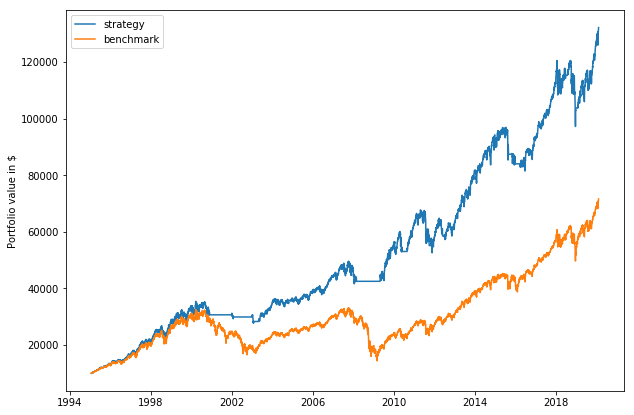

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

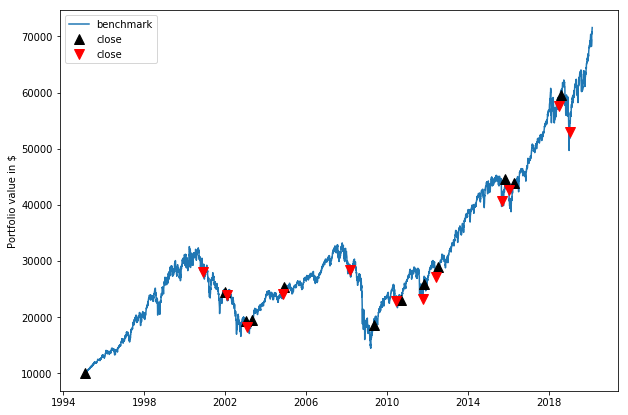

In [12]:
pf.plot_trades(dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,10.02,8.17
max_closed_out_drawdown,-22.37,-56.45
drawdown_annualized_return,-2.23,-6.91
drawdown_recovery,-0.57,-1.42
best_month,17.79,22.72
worst_month,-16.30,-29.80
sharpe_ratio,0.81,0.52
sortino_ratio,0.97,0.67
monthly_std,3.30,4.38


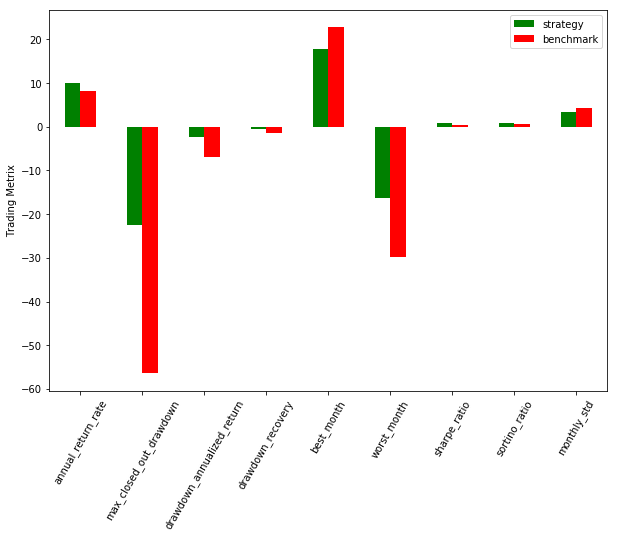

In [13]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(stats, benchmark.stats, *metrics)
df

In [14]:
returns = dbal['close']
returns.tail()

date
2020-02-10   130982.18
2020-02-11   131208.97
2020-02-12   132053.53
2020-02-13   131912.77
2020-02-14   132123.91
Name: close, dtype: float64

In [15]:
benchmark_returns = benchmark.dbal['close']
benchmark_returns.tail()

date
2020-02-10   70964.97
2020-02-11   71087.93
2020-02-12   71545.86
2020-02-13   71469.53
2020-02-14   71584.01
Name: close, dtype: float64

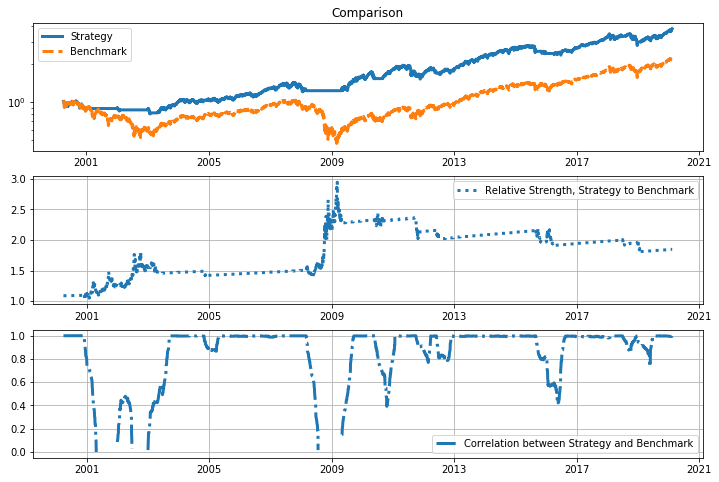

In [16]:
pf.prettier_graphs(returns, benchmark_returns, label1='Strategy', label2='Benchmark', points_to_plot=5000)